In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
# Step 1: Generate synthetic EHR-like dataset
np.random.seed(42)
n_samples = 200
ehr_data = pd.DataFrame({
    'age' : np.random.randint(30, 80, size=n_samples),
    'gender' : np.random.choice(['Male', 'Female'], size=n_samples),
    'blood_pressure' : np.random.normal(120, 15, size=n_samples),
    'cholesterol' : np.random.normal(200, 30, size=n_samples),
    'glucose' : np.random.normal(100, 20, size=n_samples),
    'diagnosis' : np.random.choice([0, 1], size=n_samples)
})


In [5]:
# Prompt: give a code to watch this dataset here

# Watch the generated dataset
print(ehr_data.head())
print(ehr_data.info())
print(ehr_data.describe())

   age  gender  blood_pressure  cholesterol     glucose  diagnosis
0   68    Male      129.385010   174.808345  106.769928          0
1   58    Male      107.142637   182.018221   91.694242          1
2   44  Female      103.936613   136.283128  112.655637          1
3   72  Female      127.237086   184.227349  145.413857          1
4   37  Female      116.648058   177.226020  103.637325          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             200 non-null    int64  
 1   gender          200 non-null    object 
 2   blood_pressure  200 non-null    float64
 3   cholesterol     200 non-null    float64
 4   glucose         200 non-null    float64
 5   diagnosis       200 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 9.5+ KB
None
              age  blood_pressure  cholesterol     glucose   diagno

In [8]:
# Step 2: Introduce Missing Values
mask = np.random.rand(n_samples) < 0.2
ehr_data.loc[mask, 'cholesterol'] = np.nan
mask = np.random.rand(n_samples) < 0.15
ehr_data.loc[mask, 'glucose'] = np.nan

# Prompt: give a code to watch the modified dataset

# Watch the dataset after introducing missing values
print(ehr_data.head())
print(ehr_data.info())
print(ehr_data.isnull().sum())

#Step 4 : Encode categorical features
label_encoder = LabelEncoder()
ehr_data['gender'] = label_encoder.fit_transform(ehr_data['gender'])

# Watch the dataset after encoding
print("\nDataset after encoding categorical features:")
print(ehr_data.head())
print(ehr_data.info())



   age  gender  blood_pressure  cholesterol     glucose  diagnosis
0   68    Male      129.385010          NaN         NaN          0
1   58    Male      107.142637          NaN   91.694242          1
2   44  Female      103.936613          NaN         NaN          1
3   72  Female      127.237086          NaN  145.413857          1
4   37  Female      116.648058    177.22602  103.637325          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             200 non-null    int64  
 1   gender          200 non-null    object 
 2   blood_pressure  200 non-null    float64
 3   cholesterol     95 non-null     float64
 4   glucose         119 non-null    float64
 5   diagnosis       200 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 9.5+ KB
None
age                 0
gender              0
blood_pressure      0
c

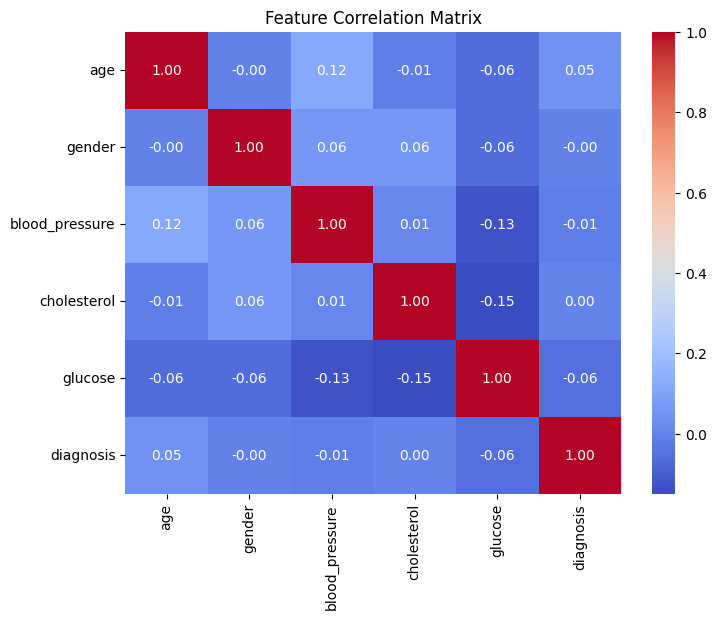

In [10]:
# Step 3 : Encode categorical variables
ehr_data['gender'] = LabelEncoder().fit_transform(ehr_data['gender'])
# Male:1, Female:0

# Step 4: Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
ehr_imputed = pd.DataFrame(imputer.fit_transform(ehr_data),
                           columns=ehr_data.columns)

# Step 5: Correlation heatmap after imputation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(ehr_imputed.corr(), annot=True, cmap='coolwarm',
            fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [11]:
# Step 6: Feature-target split
X = ehr_imputed.drop('diagnosis', axis=1)
y= ehr_imputed['diagnosis']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2, random_state=42)

# Prompt: look at the dataset again
print("\nOriginal generated dataset:")
print(ehr_data.head())
print(ehr_data.info())
print(ehr_data.describe())


Original generated dataset:
   age  gender  blood_pressure  cholesterol     glucose  diagnosis
0   68       1      129.385010          NaN         NaN          0
1   58       1      107.142637          NaN   91.694242          1
2   44       0      103.936613          NaN         NaN          1
3   72       0      127.237086          NaN  145.413857          1
4   37       0      116.648058    177.22602  103.637325          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             200 non-null    int64  
 1   gender          200 non-null    int64  
 2   blood_pressure  200 non-null    float64
 3   cholesterol     95 non-null     float64
 4   glucose         119 non-null    float64
 5   diagnosis       200 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 9.5 KB
None
              age     gender  blood_pressure  chol

In [12]:
# Step 8 : Traina classifier (e.g., RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 9: Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.41      0.32      0.36        22
         1.0       0.35      0.44      0.39        18

    accuracy                           0.38        40
   macro avg       0.38      0.38      0.37        40
weighted avg       0.38      0.38      0.37        40



<ipython-input-14-1422726153>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices],


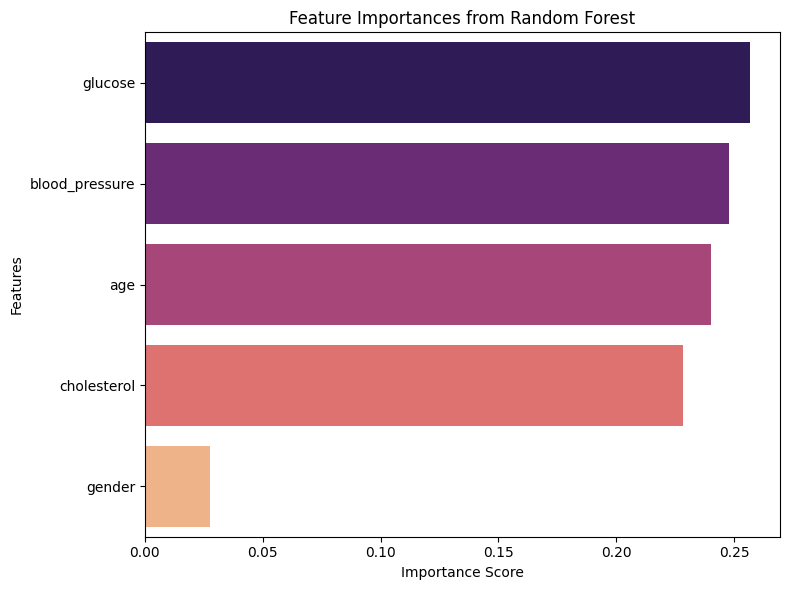

In [14]:
# Step 11: Feature importance visualization
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=features[indices],
            palette="magma")
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

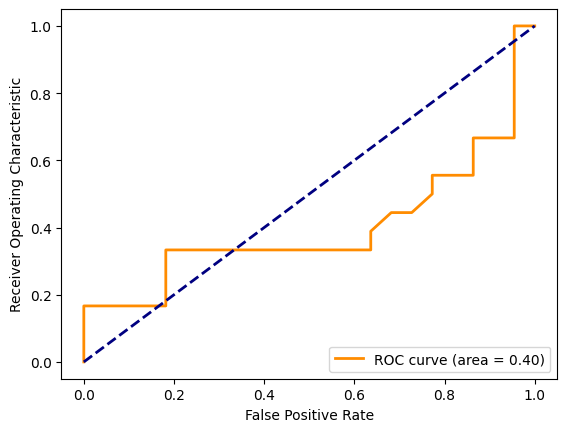

In [18]:
# Step 12 : ROC Curve
from sklearn.metrics import roc_curve, auc
probs =clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()